# PGC Buses On Time Performance Data Analysis

Our goal is to collecting Data and analyzing whether Buses has been On_Time, Delay, or Early by comparing to the scheduled time. 

The County requires monthly On-Time Performance to be minimum 75%.


Question: 
- How we going to improve the On Time Performance?


Steps on EDA.
- import library and Dataset
- Cleaning the Data
- Data Manipulation - Bus on_time, Early, Late
- Data Visualization

# 1).	Import libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as fm
import os
import glob
import re

# 2).	Import the sourcing Data Set

In [2]:
# obtain file name end with "xlsx"

path = "C:/Users/wen.cheng/OneDrive - RATP Dev/Desktop/a-snippet/z TODO 练手 3/OTP vehicle status/excel_file"

filenames = os.listdir(path)
for files in filenames:
    if "xlsx" in files:
        print(files)

schedad_bus 2-1.xlsx
schedad_bus 2-10.xlsx
schedad_bus 2-11.xlsx
schedad_bus 2-12.xlsx
schedad_bus 2-15.xlsx
schedad_bus 2-16.xlsx
schedad_bus 2-17.xlsx
schedad_bus 2-18.xlsx
schedad_bus 2-19.xlsx
schedad_bus 2-2.xlsx
schedad_bus 2-22.xlsx
schedad_bus 2-23.xlsx
schedad_bus 2-24.xlsx
schedad_bus 2-25.xlsx
schedad_bus 2-26.xlsx
schedad_bus 2-3.xlsx
schedad_bus 2-4.xlsx
schedad_bus 2-5.xlsx
schedad_bus 2-8.xlsx
schedad_bus 2-9.xlsx


## 2.1 Convert xlsx to CSV file

In [3]:
dir = "C:/Users/wen.cheng/OneDrive - RATP Dev/Desktop/a-snippet/z TODO 练手 3/OTP vehicle status/excel_file"
out_dir = "C:/Users/wen.cheng/OneDrive - RATP Dev/Desktop/a-snippet/z TODO 练手 3/OTP vehicle status/csv_file"
for file in os.listdir(dir):
    if os.path.splitext(file)[1] == '.xlsx':     
        newname = os.path.splitext(file)[0]     
        print(newname)
        data_xlsx = pd.read_excel(dir +'/'+ file, index_col=0)
        data_xlsx.to_csv(out_dir + '/'+ newname + '.csv',encoding='utf-8')
    else:    
        continue
print('All the excel file have been Convert!')

schedad_bus 2-1
schedad_bus 2-10
schedad_bus 2-11
schedad_bus 2-12
schedad_bus 2-15
schedad_bus 2-16
schedad_bus 2-17
schedad_bus 2-18
schedad_bus 2-19
schedad_bus 2-2
schedad_bus 2-22
schedad_bus 2-23
schedad_bus 2-24
schedad_bus 2-25
schedad_bus 2-26
schedad_bus 2-3
schedad_bus 2-4
schedad_bus 2-5
schedad_bus 2-8
schedad_bus 2-9
All the excel file have been Convert!


## 2.2 import one csv file and review the basic info of the data

In [4]:
path1 = "./csv_file/schedad_bus 2-1.csv"
df = pd.read_csv(path1)
df.head(2)

,ID,Job,Route,Direction,Stop,Date,Scheduled,Actual,Different,Status
0,62616,1703R,Route 17 (Route 1 Ride),Northbound,Ikea at Bus Bay 3,2021-02-01 00:00:00,1970-01-01 14:05:00,1970-01-01 14:22:11,-00:17:11,late
1,62616,1703R,Route 17 (Route 1 Ride),Southbound,Ikea at Bus Bay 3,2021-02-01 00:00:00,1970-01-01 14:15:00,1970-01-01 14:22:37,-00:07:37,late


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         1295 non-null   object
 1   Job        1295 non-null   object
 2   Route      1295 non-null   object
 3   Direction  1295 non-null   object
 4   Stop       1295 non-null   object
 5   Date       1295 non-null   object
 6   Scheduled  1295 non-null   object
 7   Actual     1295 non-null   object
 8   Different  1295 non-null   object
 9   Status     1295 non-null   object
dtypes: object(10)
memory usage: 101.3+ KB


In [6]:
df.shape

(1295, 10)

## 2.3 import multiple csv files into pandas and concatenate into one DataFrame


In [7]:
# Combine all CSV file to single csv file and save

path = "C:/Users/wen.cheng/OneDrive - RATP Dev/Desktop/a-snippet/z TODO 练手 3/OTP vehicle status/csv_file"
all_files = glob.glob(path + "/*.csv")

li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df1 = pd.concat(li, axis=0, ignore_index=True)
df1.to_csv(out_dir + '/test.csv')

In [8]:
df2 = pd.read_csv("./csv_file/test.csv")
df2.shape

(32236, 11)

# 3), Cleaning the Data

In [9]:
# quick overview of the data. 
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32236 entries, 0 to 32235
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  32236 non-null  int64 
 1   ID          31782 non-null  object
 2   Job         30786 non-null  object
 3   Route       30291 non-null  object
 4   Direction   30291 non-null  object
 5   Stop        30291 non-null  object
 6   Date        32203 non-null  object
 7   Scheduled   30291 non-null  object
 8   Actual      30291 non-null  object
 9   Different   30256 non-null  object
 10  Status      30256 non-null  object
dtypes: int64(1), object(10)
memory usage: 2.7+ MB


In [10]:
# quick overview the basic statistic of numeric data, 
df2.describe()

,Unnamed: 0
count,32236.000000
mean,16117.500000
std,9305.875975
min,0.000000
25%,8058.750000
50%,16117.500000
75%,24176.250000
max,32235.000000


In [11]:
# Drop Column - 'Unnamed: 0'
df2.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [12]:
df2.shape

(32236, 10)

## 3.1 Cleaning NAN Value

In [13]:
df2.dropna(subset=['ID', 'Job', 'Route', 'Direction', 'Stop', 'Date', 'Scheduled', 'Actual', 'Different', 'Status'], how = 'any', inplace = True)

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30256 entries, 0 to 32235
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         30256 non-null  object
 1   Job        30256 non-null  object
 2   Route      30256 non-null  object
 3   Direction  30256 non-null  object
 4   Stop       30256 non-null  object
 5   Date       30256 non-null  object
 6   Scheduled  30256 non-null  object
 7   Actual     30256 non-null  object
 8   Different  30256 non-null  object
 9   Status     30256 non-null  object
dtypes: object(10)
memory usage: 2.5+ MB


## 3.2 keep numeric only on Column "ID" 

In [15]:
# removed anything and keep numbers only
df2['ID'] = df2['ID'].str.replace('[^0-9]','')
df2['Job'] = df2['Job'].str.replace('[^0-9]','')

In [16]:
df2['ID'].unique()

array(['62616', '62637', '62621', '62622', '62632', '62645', '62649',
       '62650', '63012', '63013', '63015', '63016', '63017', '63019',
       '63020', '63021', '63024', '63025', '63027', '63028', '63029',
       '63030', '63031', '63032', '63035', '63162', '63196', '63204',
       '63206', '63208', '63210', '63211', '63215', '62618', '62620',
       '62646', '62651', '63014', '63022', '63033', '63034', '63036',
       '63160', '63198', '62625', '62634', '62642', '62812', '63023',
       '62813', '63011', '63209', '63188', '63026', '63203', '62624'],
      dtype=object)

In [17]:
df2['Job'].unique()

array(['1703', '1803', '3203', '3602', '1602', '1601', '1802', '1702',
       '1701', '2401', '3501', '1704', '3003', '3002', '3304', '2602',
       '2002', '2402', '2003', '3302', '2104', '1806', '2101', '1804',
       '2603', '2404', '1603', '2001', '1604', '3004', '1801', '2403',
       '2004', '2102', '3301', '3402', '1805', '3303', '5101', '5102',
       '3702', '3701', '3001', '3502', '3204', '1301', '3401', '3601',
       '2103', '2601', '2604', '3503', '1302', '3202', '2802', '3504',
       '2801', '5103', '5104', '3201'], dtype=object)

## 3.3 Rename the values on Column "Route"

In [18]:
# Rename the values
df2['Route'] = df2['Route'].replace("Route 17 (Route 1 Ride)", "Route 17")
df2['Route'] = df2['Route'].replace("Route 51 Loop A", "Route 51A")
df2['Route'] = df2['Route'].replace("Route 51 Loop B", "Route 51B")
df2['Route'] = df2['Route'].replace("Route 51 Loop X", "Route 51X")

In [19]:
df2['Route'].unique()

array(['Route 17', 'Route 18', 'Route 32', 'Route 36', 'Route 16',
       'Route 24', 'Route 35', 'Route 30', 'Route 33', 'Route 26',
       'Route 20', 'Route 21', 'Route 34', 'Route 51X', 'Route 37',
       'Route 13', 'Route 28', 'Route 51A', 'Route 51B'], dtype=object)

## 3.4 updated Datatype

In [20]:
# Change Datatype "Date" to - Datetime
df2['Date'] = pd.to_datetime(df2['Date'])

In [21]:
# Column "Scheduled" - keep only Time Value.(removed Date) 
new = df2['Scheduled'].str.split(" ", n = 1, expand = True)
df2['Scheduled'] = new[1]

new1 = df2['Actual'].str.split(" ", n = 1, expand = True)
df2['Actual'] = new1[1]

In [22]:
# Split String by ":" . and convert time to minutes in integer. 
df2['Scheduled1'] = df2['Scheduled'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

df2['Actual1'] = df2['Actual'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
df2['Actual1'].head(5)

0    862
1    862
2    871
3    878
4    884
Name: Actual1, dtype: int64

# 4), Analysing the Data and apply them.

## 4.1 obtain bus Count on bus arrived early, delay and on_time

In [23]:
# find out the different time between actual and schedule:
df2['dif_time'] = df2['Actual1'] - df2['Scheduled1']

In [24]:
# filter out all time early bus. and count how many bus that has been early.

time_early = df2[(df2['dif_time']< 0) & (df2['dif_time'] > -15)]
time_early_count = time_early['dif_time'].count()
print("Number of Buses Arrived Early: ", time_early_count)

on_time = df2[(df2['dif_time']>=0) & (df2['dif_time'] <=7)]
on_time_count = on_time['dif_time'].count()
print("Number of Buses Arrived On Time: ", on_time_count)

delay_time = df2[(df2['dif_time'] > 7) & (df2['dif_time'] < 15)]
delay_time_count = delay_time['dif_time'].count()
print("Number of Buses Arrived Late: ", delay_time_count)

print('---------------------------')
Total_Bus_Count = time_early_count + on_time_count + delay_time_count
print("Total February Buses Count : ", Total_Bus_Count)

Number of Buses Arrived Early:  4975
Number of Buses Arrived On Time:  20230
Number of Buses Arrived Late:  3423
---------------------------
Total February Buses Count :  28628


## 4.2 Shows Buses distribution on Each Category. 

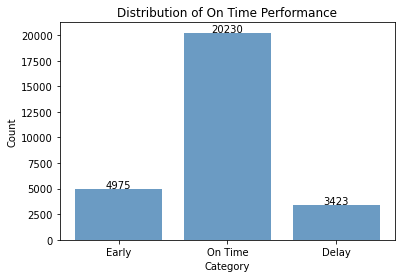

In [25]:
bar_data = [time_early_count, on_time_count, delay_time_count]
plt.bar(range(3), bar_data, align='center', color='steelblue', alpha = 0.8)
plt.ylabel('Count')
plt.xlabel('Category')
plt.xticks(range(3),['Early', 'On Time', 'Delay'])
plt.title('Distribution of On Time Performance')
for x,y in enumerate(bar_data):
    plt.text(x,y+50, '%s' %round(y,0), ha='center')

plt.show()

In [26]:
# set up a function to produce more beautiful pie charts. it could be repeatly use
def pie_chart(fractions,    
              labels,       
              title = '', 
              cm_name = 'Pastel1',      
              autopct = lambda x: str(round(x, 2)) + '%',    
              labeldistance = 1.01,   
              shadow = False,     
              startangle = 90,    
              edgecolor = 'g',  
              width = 7,   
              height = 7,   
              grouping_threshold = None,    
              grouping_label = None):     
    
    # if the user passed a threshold value, group all fractions lower than it into one 'misc' pie wedge
    if not grouping_threshold == None:
        
        # if user didn't pass a label, apply a default text
        if grouping_label == None:
            grouping_label = 'Others'

        # group all other rows below the cut-off value
        all_others = pd.Series(fractions[~row_mask].sum())
        all_others.index = [grouping_label]
    
    # get the color map then pull 1 color from it for each pie wedge we'll draw
    color_map = cm.get_cmap(cm_name)
    num_of_colors = len(fractions)
    colors = color_map([x/float(num_of_colors) for x in range(num_of_colors)])
    
    # create the figure and an axis to plot on
    fig, ax = plt.subplots(figsize=[width, height])
    
    # plot the pie
    wedges = ax.pie(fractions, 
                    labels = labels, 
                    labeldistance = labeldistance,
                    autopct = autopct,
                    colors = colors,
                    shadow = shadow, 
                    startangle = startangle)
    
    # change the edgecolor for each wedge
    for wedge in wedges[0]:
        wedge.set_edgecolor(edgecolor)
    
    # set the title and show the plot
    ax.set_title(title)
    plt.show()

## 4.3 Shows Percentage On Time Performance

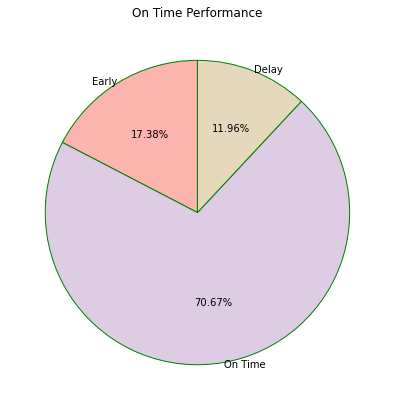

In [27]:
OTP_data = [ time_early_count ,on_time_count, delay_time_count]
labels = 'Early', 'On Time' , 'Delay'
pie_chart(fractions = OTP_data,
          labels = labels,
          title = 'On Time Performance')

### Conclusion

Base on the data we collect, we had totals of 28628 buses on each TimePoint and group them into three categories (Early, On-Time, and Late).
- we had 17.38% Buses Early. 
- we had 11.96% Buses Late.
- we had 70.67% Buses On_Time. 

We did not meet the 75% target set up by County. we will need to deep more further into data and see how we can improve the on-time performance.

In [28]:
# mean_bus = df2.groupby(['Route','Job'], as_index=False)['dif_time'].mean()
# # highest_time = df2['dif_time'].max()
# mean_bus.max()

# 5), Analysing Arrived Early Buses

### 5.1 Top 5 Timepoints has most Buses Arrived Early

In [29]:
most_early = time_early['Stop'].groupby(time_early['dif_time']).value_counts()
most_early.head(5)

dif_time  Stop                        
-14       Addison Rd Metrorail Station    4
          Branch Ave Station Bus Bay J    2
          County Courthouse               2
          Equestrian Center Lot 1         2
          New Carrollton Station          2
Name: Stop, dtype: int64

### Conclusion:

- with a maximum of 14 minutes Arrived the Early time range, the above data shows the top 5 Timestop has the most delay in the systems. basic on County requirement if the bus arrived more than 15 min early. we will count it as missed Trips. 
- we need to notify all Operators who run on that TimeStop, either adjust their TimeStop waiting time or adjust their bus schedule to avoid or reduce Arrived early on those Timestop.

### 5.2 Show Early Buses Count by Routes

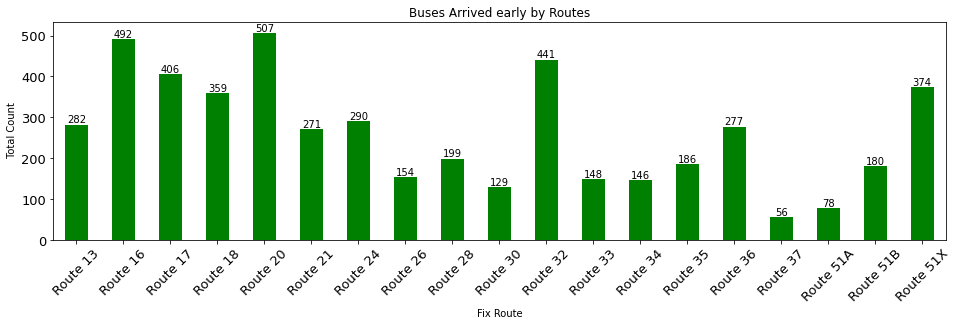

In [30]:
time_early_route = time_early.groupby(['Route'])['ID'].count()

ax = time_early_route.plot(kind='bar', figsize=(16,4), color="green", fontsize=13);
# ax.set_alpha(0.8)
plt.ylabel(' Total Count')
plt.title('Buses Arrived early by Routes')
plt.xlabel('Fix Route')
for x,y in enumerate(time_early_route):
    ax.text(x,y+5,'%s' %round(y,2), ha='center')
plt.xticks(rotation=45)
# time_early_route.plot.bar()
plt.show()

### Conclusion:
- top 3 Route has the most Bus Arrived Early were Route 20, 16 and 32.
    - Route 16 at 492 Count Early
    - Route 20 at 507 Count Early
    - Route 32 at 441 Count Early

### 5.3 Top 5 Buses has the highest Arrived Early frequency.

In [31]:
time_early.groupby(['ID']).Stop.value_counts().nlargest(10)

ID     Stop                             
62812  Gov. Oden Bowie Dr at Rear C.A.B.    29
       Equestrian Center Lot 1              27
       Courthouse                           26
       Governor Oden Bowie Dr at Elm St     26
       Judge's Dr at Pratt St               26
62813  Judge's Dr at Pratt St               22
       Courthouse                           21
63024  Arena Dr at Shoppers Way (Largo)     21
63025  Arena Dr at Shoppers Way (Largo)     21
62813  Gov. Oden Bowie Dr at Rear C.A.B.    18
Name: Stop, dtype: int64

### Conclusion:

- above data shows the top 5 Buses has the most count of  Arrived Early in specific Timepoint. 
- basic on Bus ID Number and TimeStop,  it would be necessary to investigate those buses in above Timepoint. and discover the issue if there's any improvement we need to make. 
- our goal is to reduce the total number of Bus Arrived Early - so we can improve On-Time Performance.  

### 5.4 Top 5 highest timepoint frequency basic on Job, Direction and Early Time.

In [32]:
time_early.groupby(['Job', 'Direction', 'dif_time']).Stop.value_counts().nlargest(5)

Job   Direction                      dif_time  Stop                              
1301  Loop B                         -1        Ager Rd at Nicholson St               39
                                               West Hyattsville Station - Arrival    35
1302  Loop A                         -1        Belcrest Rd at 6505 Belcrest Rd       26
1301  Loop B                         -1        42nd Ave at Oglethorpe St             24
3402  To Suitland Metrorail Station  -1        3930 Capitol Crossing Apts            23
Name: Stop, dtype: int64

### 5.5 Find the highest "Route" and "Job number" basic on Average Arrived Early time 

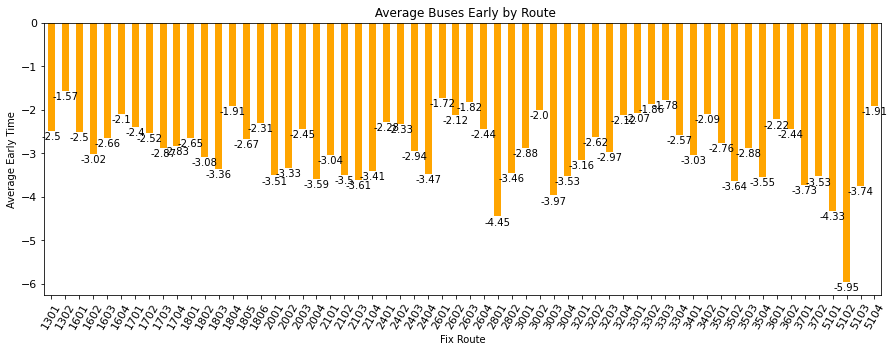

In [33]:
early_bus_mean = time_early.groupby(['Job'])['dif_time'].mean()
ax1 = early_bus_mean.plot(kind='bar', figsize=(15,5), color="orange", fontsize=11);
ax.set_alpha(1)
plt.ylabel('Average Early Time')
plt.title(' Average Buses Early by Route')
plt.xlabel('Fix Route')
for x,y in enumerate(early_bus_mean):
    ax1.text(x,y-0.2,'%s' %round(y,2), ha='center')
plt.xticks(rotation=60)

plt.show()

In [34]:
early_bus_mean = time_early.groupby(['Job','Route'], as_index=False)['dif_time'].mean()
print(early_bus_mean.sort_values(by='dif_time').head(1))

     Job      Route  dif_time
57  5102  Route 51X -5.948905


### Conclusion
- the highest average Arrived Early time is from Job Number 5102 which is from Route 51X with an average early time of 5.95 Minutes. 
- it's way much higher Early Time compare to other Job Number overall. 

# 6), Analysing the Delay Bus

### 6.1 Top 5 Timepoints has the most Buses Arrived Late

In [35]:
most_delay = delay_time['Stop'].groupby(delay_time['dif_time']).value_counts()
most_delay.head(5)

dif_time  Stop                                    
8         Equestrian Center Lot 1 (Hidden Arrival)    45
          Padgett's Corner                            32
          Hamilton St at 38th St                      23
          Largo Town Center Station                   22
          23rd Ave at Lewisdale Dr                    18
Name: Stop, dtype: int64

### 6.2 Top 5 Buses has the highest Delay frequency.

In [36]:
delay_time.groupby(['ID']).Stop.value_counts().nlargest(5)

ID     Stop                                    
62812  Equestrian Center Lot 1 (Hidden Arrival)    63
63024  Largo Town Center Station at Bus Bay E      18
63025  Largo Town Center Station at Bus Bay E      17
62618  23rd Ave at Lewisdale Dr                    16
63033  Hamilton St at 38th Ave                     16
Name: Stop, dtype: int64

### 6.3 Show Delay Buses Count by Routes

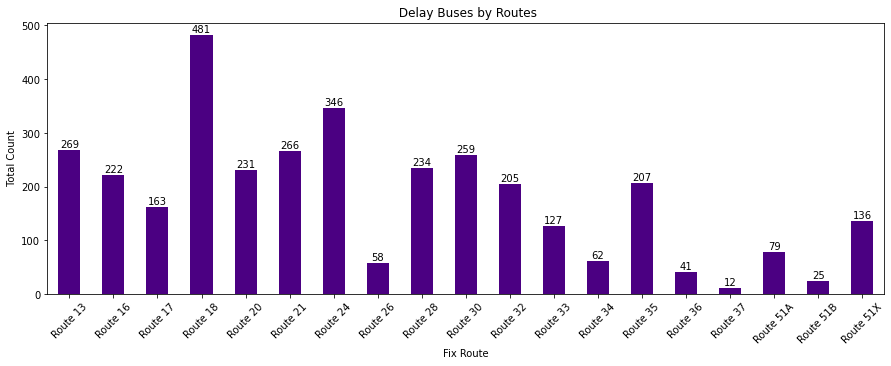

In [37]:
time_delay_route = delay_time.groupby(['Route'])['ID'].count()

ax = time_delay_route.plot(kind='bar', figsize=(15,5), color="indigo", fontsize=10);
# ax.set_alpha(1)
plt.ylabel(' Total Count')
plt.title(' Delay Buses by Routes')
plt.xlabel('Fix Route')
for x,y in enumerate(time_delay_route):
    ax.text(x,y+5,'%s' %round(y,0), ha='center')
plt.xticks(rotation=45)
plt.show()

### Conclusion:
- top 3 Routes that have the most Count on Delay buses were Route 13, 18, and 24.
- Route 18 has a way much higher delay count compare to other Routes.

### 6.4 Highest Average Delay time 

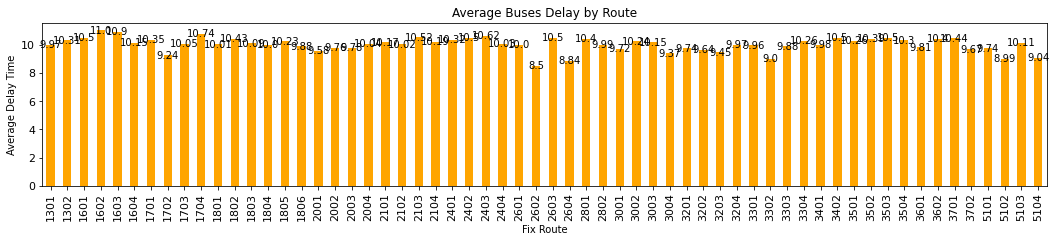

In [38]:
delay_bus_mean = delay_time.groupby(['Job'])['dif_time'].mean()
ax1 = delay_bus_mean.plot(kind='bar', figsize=(18,3), color="orange", fontsize=11);
plt.ylabel('Average Delay Time')
plt.title('Average Buses Delay by Route')
plt.xlabel('Fix Route')
for x,y in enumerate(delay_bus_mean):
    ax1.text(x,y-0.2,'%s' %round(y,2), ha='center')
plt.xticks(rotation=90)

plt.show()

In [39]:
delay_bus_mean = delay_time.groupby(['Job','Route'], as_index=False)['dif_time'].mean()
print(delay_bus_mean.sort_values(by='dif_time').tail(1))

    Job     Route  dif_time
3  1602  Route 16      11.0


### Conclusion
- we had ranged from 9 to 11 minutes average delay time throughout the job numbers.
- the highest average delay time is 11 minutes from job number 1602 at route 16.

# Overall Summary:

we analyze the data by grouping all data into Three Categories ( Early, On_time and Delay).

Buses Early and Buses Delay were the data we need to deep into and analyzing to find out what data will tell us.

I use different methods to find out the Top 3 or top 5, Bus, timepoint, Route ETC.... that cause the issue on affecting the Percentage of On_time_Performance.

by showing the result to the operating Manager, they will able to narrow down the problem and do some investigation and figure out whether we should adjust Bus Schedule time, or find a shortcut by changing different roads. or adding a new bus to the Specific Route if necessary.